In [41]:
import pandas as pd
import numpy as np

In [42]:
labels = np.load('../data/train.npy', allow_pickle=True)

In [43]:
label_len = len(labels)

In [61]:
# data_main2 = pd.read_csv('../data/data_main2.csv', header=None)[0].values
# attacker_main2 = pd.read_csv('../attacker/attacker_main2.csv', header=None)[0].values

# data_layer_norm = pd.read_csv('../data/data_layer_norm.csv', header=None)[0].values
# attacker_layer_norm = pd.read_csv('../attacker/attacker_layer_norm.csv', header=None)[0].values

# data_layer_norm1 = pd.read_csv('../data/data_layer_norm1.csv', header=None)[0].values
# attacker_layer_norm1 = pd.read_csv('../attacker/attacker_layer_norm1.csv', header=None)[0].values


# data_combined = pd.read_csv('../data/data_combined.csv', header=None)[0].values
# attacker_combined = pd.read_csv('../attacker/attacker_combined.csv', header=None)[0].values

data_layer_norm = pd.read_csv('../data/data_layer_norm.csv', header=None)[0].values
attacker_layer_norm = pd.read_csv('../attacker1/attacker_chau.csv', header=None)[0].values

In [62]:
def accuracy(pred, actual):
    return sum(pred==actual)/len(actual)

In [63]:
# accuracy(data_main2[:label_len], labels), accuracy(attacker_main2[:label_len], labels)

In [64]:
accuracy(data_layer_norm[:label_len], labels), accuracy(attacker_layer_norm[:label_len], labels)

(0.6862759894614928, 0.6855476119388294)

In [48]:
# accuracy(data_layer_norm1[:label_len], labels), accuracy(attacker_layer_norm1[:label_len], labels)

(0.6862759894614928, 0.6853950463766499)

In [49]:
# accuracy(data_combined[:label_len], labels), accuracy(attacker_combined[:label_len], labels)

(0.6408623071193982, 0.6153822177455075)

Now care only about the target part.

In [65]:
# data_main2 = pd.read_csv('../data/data_main2.csv', header=None)[0].values[label_len:label_len+50000]
# data_combined = pd.read_csv('../data/data_combined.csv', header=None)[0].values[label_len:label_len+50000]

# data_layer_norm = pd.read_csv('../data/data_layer_norm.csv', header=None)[0].values[label_len:label_len+50000]
# attacker_layer_norm = pd.read_csv('../attacker/attacker_layer_norm.csv', header=None)[0].values[label_len:label_len+50000]

# data_layer_norm1 = pd.read_csv('../data/data_layer_norm1.csv', header=None)[0].values[label_len:label_len+50000]
# attacker_layer_norm1 = pd.read_csv('../attacker/attacker_layer_norm1.csv', header=None)[0].values[label_len:label_len+50000]


# attacker_main2 = pd.read_csv('../attacker/attacker_main2.csv', header=None)[0].values[label_len:label_len+50000]
# attacker_combined = pd.read_csv('../attacker/attacker_combined.csv', header=None)[0].values[label_len:label_len+50000]

data_layer_norm = pd.read_csv('../data/data_layer_norm.csv', header=None)[0].values[label_len:label_len+50000]
attacker_layer_norm = pd.read_csv('../attacker1/attacker_chau.csv', header=None)[0].values[label_len:label_len+50000]

In [51]:
# accuracy(data_main2, attacker_main2)

0.58434

In [66]:
accuracy(data_layer_norm, attacker_layer_norm)

0.88566

In [53]:
accuracy(data_layer_norm1, attacker_layer_norm1)

0.87984

In [54]:
accuracy(data_combined, attacker_combined)

0.26608

# Visualizing the models

In [67]:
from gcn import *
import pickle as pkl
from utils import *
import numpy as np
import sys
import os
from torch.autograd import Variable
import time

In [68]:
pip install torchviz

  Created wheel for torchviz: filename=torchviz-0.0.1-cp37-none-any.whl size=3526 sha256=ef02c7580b43cb2052178543972d37399e543845f72a1a25b7f746a2320df4c8
  Stored in directory: C:\Users\chaupham\AppData\Local\pip\Cache\wheels\2a\c2\c5\b8b4d0f7992c735f6db5bfa3c5f354cf36502037ca2b585667
Successfully built torchviz
Note: you may need to restart the kernel to use updated packages.


In [69]:
dims = [100, 256, 128, 64, 18]

os.environ["CUDA_VISIBLE_DEVICES"] = '0'
args = ['holder', '../data/adj.pkl', '../data/feature.npy', '../data/data_layer_norm.csv']
# args = sys.argv
adj = pkl.load(open(args[1], 'rb'))
features = np.load(args[2])
processed_adj = GCNadj(adj)

featuretensor = torch.FloatTensor(features).cuda()
adjtensor = sparse_matrix_to_sparse_tensor(processed_adj)

model = GCN_norm(len(dims) - 1, dims)

model.load_state_dict(torch.load("weights"))
model = model.cuda()
model.eval()
testout = model(featuretensor, adjtensor, dropout=0)

In [78]:
from torchviz import make_dot

In [79]:
make_dot?

In [80]:
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin'

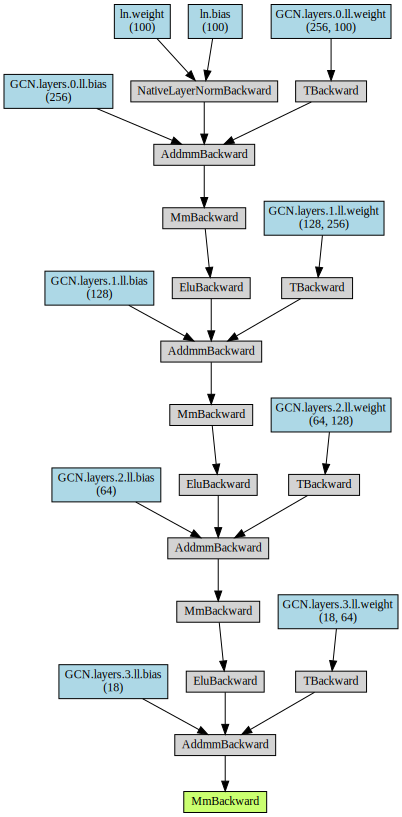

In [81]:
make_dot(testout, dict(model.named_parameters()))

In [84]:
args = ['holder', '../data/adj.pkl', '../data/feature.npy', '../data/data_layer_norm.csv']
# args = sys.argv

os.environ["CUDA_VISIBLE_DEVICES"] = '0'

adj = pkl.load(open(args[1], 'rb'))
features = np.load(args[2])
processed_adj = GCNadj(adj)

featuretensor = torch.FloatTensor(features).cuda()
adjtensor = sparse_matrix_to_sparse_tensor(processed_adj)

model = MyModel("weights4layernorm")

model.load_state_dict(torch.load("weights4layernorm"))
model = model.cuda()
model.eval()
testout = model(featuretensor, adjtensor, dropout=0)


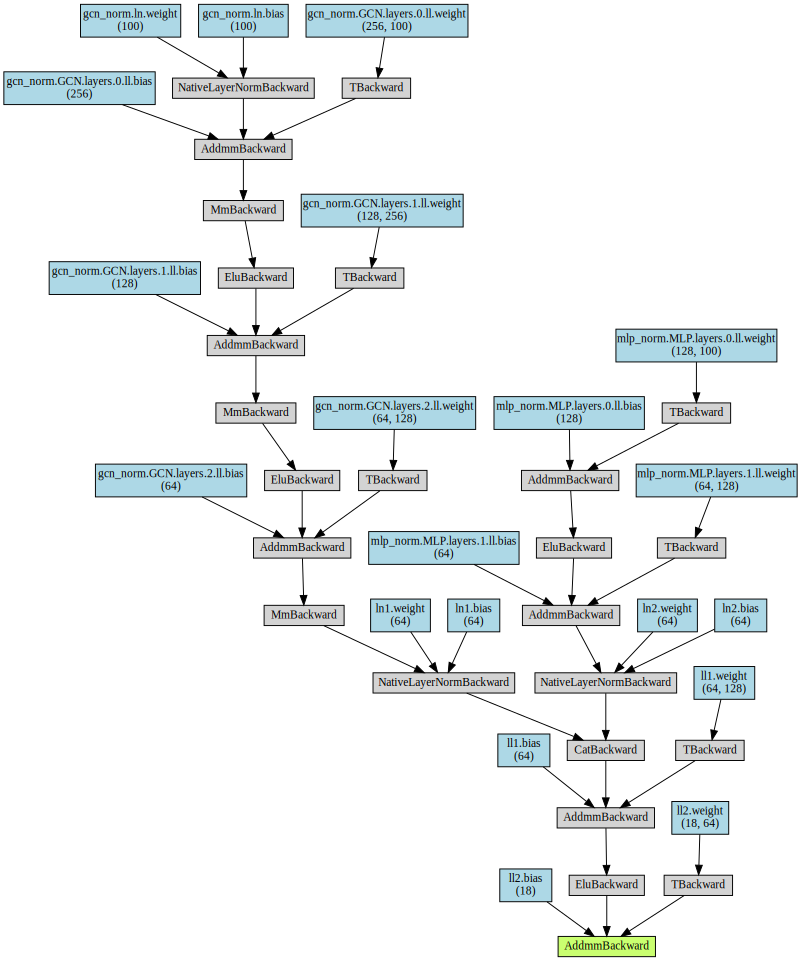

In [85]:
make_dot(testout, dict(model.named_parameters()))

In [86]:
model.state_dict()

OrderedDict([('gcn_norm.GCN.layers.0.ll.weight',
              tensor([[ 0.0115, -0.0090,  0.0308,  ...,  0.0065,  0.0730, -0.0529],
                      [ 0.0260, -0.0309,  0.0628,  ...,  0.0073, -0.0360, -0.0628],
                      [ 0.0121,  0.0327,  0.0409,  ..., -0.0194, -0.0223,  0.0564],
                      ...,
                      [ 0.0467,  0.0047, -0.0382,  ..., -0.0156,  0.0590, -0.0298],
                      [-0.0459, -0.0741,  0.0063,  ...,  0.0855,  0.1106, -0.0089],
                      [ 0.0195, -0.0037,  0.0800,  ...,  0.0987, -0.0532,  0.0686]],
                     device='cuda:0')),
             ('gcn_norm.GCN.layers.0.ll.bias',
              tensor([-0.0136, -0.0846, -0.0431,  0.0501,  0.0330, -0.0616, -0.0754,  0.0328,
                       0.0782, -0.0689,  0.0322, -0.0003, -0.0679,  0.0644, -0.0021,  0.0047,
                      -0.0380, -0.0624, -0.0681,  0.1009,  0.0801,  0.0487,  0.0200, -0.0772,
                      -0.0133, -0.0047, -0.0145,  